# Importing Libraries

In [1]:
import os
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
# fitting the encoder in the categaorcal data to identify the unique categories
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Dataset creation

In [3]:
IMAGE_SIZE = 128

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
     "C:\\Users\\LENOVO\\Downloads\\archive (10)\\brain_tumor_dataset",
     shuffle=True,
     image_size = (IMAGE_SIZE,IMAGE_SIZE)
)

Found 253 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
class_names

['no', 'yes']

# Images with Brain Tumor

In [6]:
data = []
paths = []
result = []

for r, d, f in os.walk("C:\\Users\\LENOVO\\Downloads\\archive (10)\\brain_tumor_dataset\\yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

# Images without Brain Tumor

In [7]:
paths = []
for r, d, f in os.walk("C:\\Users\\LENOVO\\Downloads\\archive (10)\\brain_tumor_dataset\\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())      


In [8]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [9]:
result = np.array(result)
result = result.reshape(139,2)

# Visualization of Tumor Images

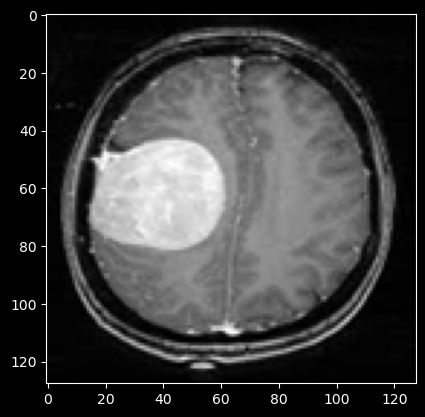

In [10]:
plt.imshow(data[0])

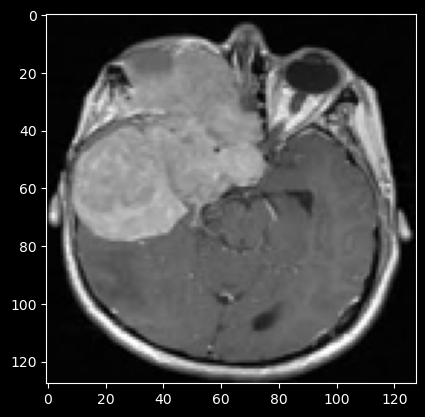

In [11]:
plt.imshow(data[5])

# Data Splitting

In [12]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Creation Using Sequential Method

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

# Model Configuration

In [14]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [15]:
x_train.shape

(111, 128, 128, 3)

In [16]:
y_train.shape

(111, 2)

In [24]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 64, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
2/2 [==============================] - 4s 2s/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 5.1789 - val_accuracy: 0.7500
Epoch 2/30
2/2 [==============================] - 5s 3s/step - loss: 2.5104e-04 - accuracy: 1.0000 - val_loss: 4.9760 - val_accuracy: 0.7500
Epoch 3/30
2/2 [==============================] - 4s 2s/step - loss: 1.4700e-05 - accuracy: 1.0000 - val_loss: 4.8540 - val_accuracy: 0.7857
Epoch 4/30
2/2 [==============================] - 4s 2s/step - loss: 3.4522e-04 - accuracy: 1.0000 - val_loss: 4.7861 - val_accuracy: 0.7857
Epoch 5/30
2/2 [==============================] - 4s 2s/step - loss: 2.5622e-04 - accuracy: 1.0000 - val_loss: 4.7408 - val_accuracy: 0.7857
Epoch 6/30
2/2 [==============================] - 4s 2s/step - loss: 1.9064e-05 - accuracy: 1.0000 - val_loss: 4.7057 - val_accuracy: 0.7857
Epoch 7/30
2/2 [==============================] - 4s 2s/step - loss: 1.0878e-06 - accuracy: 1.0000 - val_loss: 4.6831 - val_accuracy: 0.7857
Epoch 8/30
2/2 [=

In [25]:
score = model.evaluate(x_test,y_test,batch_size=64)
print("\nTest Accuracy: %.1f%%" % (100.0 * score[1]))

1/1 [==============================] - 0s 131ms/step - loss: 4.1339 - accuracy: 0.7143

Test Accuracy: 71.4%


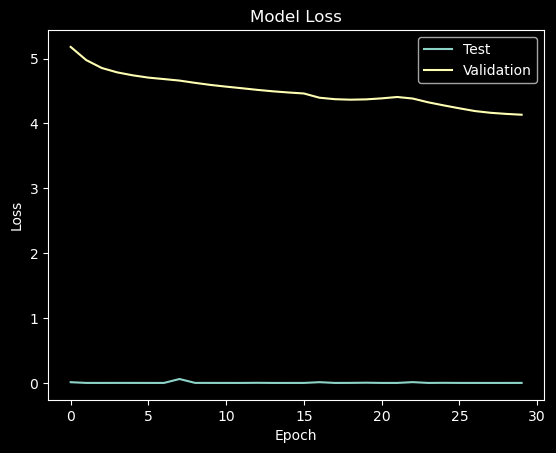

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Model Prediction

In [27]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its not a Tumor'

100.0% Confident that Its not a Tumor


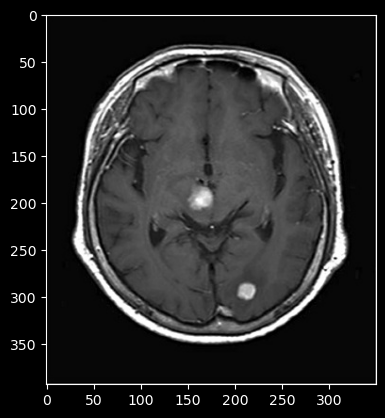

In [28]:
from matplotlib.pyplot import imshow
img = Image.open("C:\\Users\\LENOVO\\Downloads\\archive (10)\\brain_tumor_dataset\\no\\N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confident that ' + names(classification))

99.99997615814209% Confident that Its a Tumor


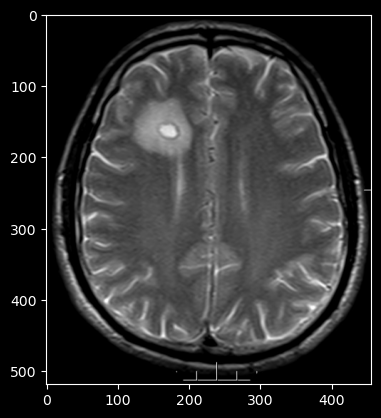

In [29]:
from matplotlib.pyplot import imshow
img = Image.open("C:\\Users\\LENOVO\\Downloads\\archive (10)\\brain_tumor_dataset\\yes\\Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confident that ' + names(classification))
